In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [42]:
df = pd.read_csv('ayx_cash_flow.csv', index_col='Cash_Flow')
df = df.T.reset_index()


In [43]:
selected_columns = ['Free Cash Flow', 'Sale Of Investment', 'Stock Based Compensation']
selected_df = df[['index'] + selected_columns]

# Line plot for Free Cash Flow
fig1 = px.line(selected_df, x='index', y='Free Cash Flow', title='Free Cash Flow Over Time')

# Bar plot for Sale Of Investment
fig2 = px.bar(selected_df, x='index', y='Sale Of Investment', title='Sale Of Investment Over Time')

# Bar plot for Stock Based Compensation
fig3 = px.bar(selected_df, x='index', y='Stock Based Compensation', title='Stock Based Compensation Over Time')

# Show the plots
fig1.show()
fig2.show()
fig3.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, markers=True)
plt.title('Cash Flow Categories Over Years')
plt.ylabel('Cash Flow')
plt.xlabel('Year')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y=df['Free Cash Flow'])
plt.title('Cash Flow Categories in 2022-12-31')
plt.ylabel('Cash Flow')
plt.xlabel('Cash Flow Category')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".0f")
plt.title('Cash Flow Over Years')
plt.ylabel('Year')
plt.xlabel('Cash Flow Category')
plt.show()


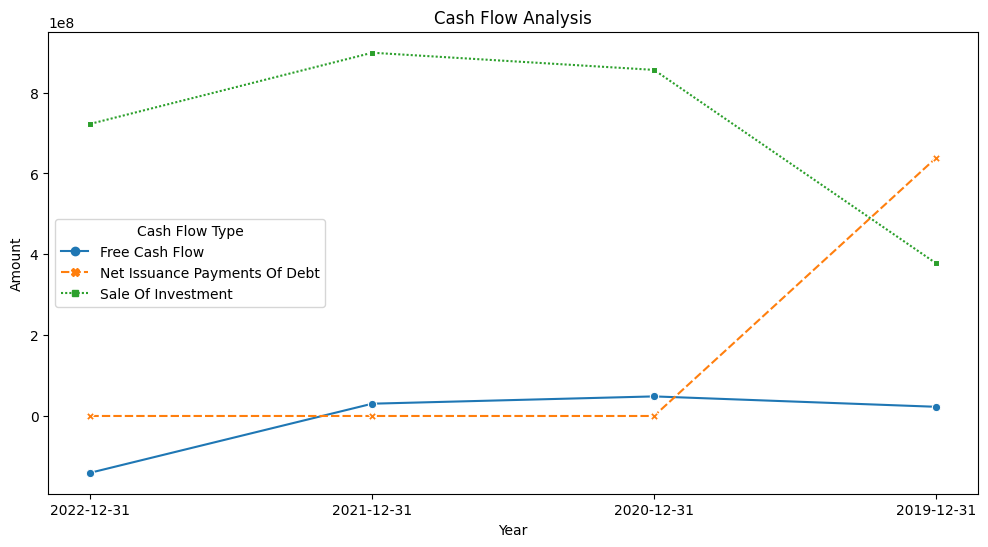

In [10]:
# Extract relevant columns for plotting
plot_data = df[['Free Cash Flow', 'Net Issuance Payments Of Debt', 'Sale Of Investment']]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Cash Flow Analysis')
plt.xlabel('Year')
plt.ylabel('Amount in billions')
plt.legend(title='Cash Flow Type')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


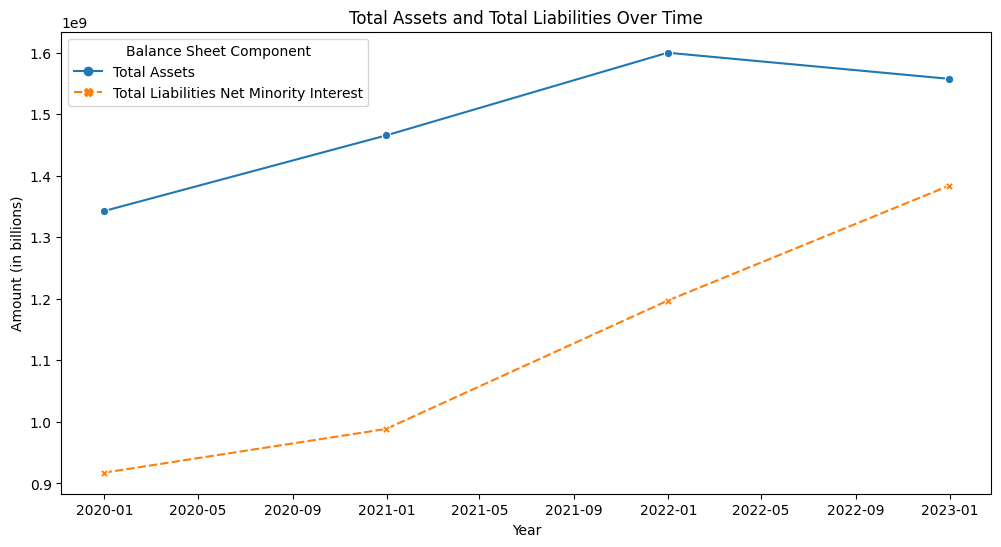

In [12]:
df = pd.read_csv('ayx_balancesheet.csv')

# Transpose the DataFrame for easier manipulation
df = df.set_index("Balace_sheet_actuals").T

# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Extract relevant columns for plotting
plot_data = df[['Total Assets', 'Total Liabilities Net Minority Interest']]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, markers=True)
plt.title('Total Assets and Total Liabilities Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.legend(title='Balance Sheet Component')
plt.show()

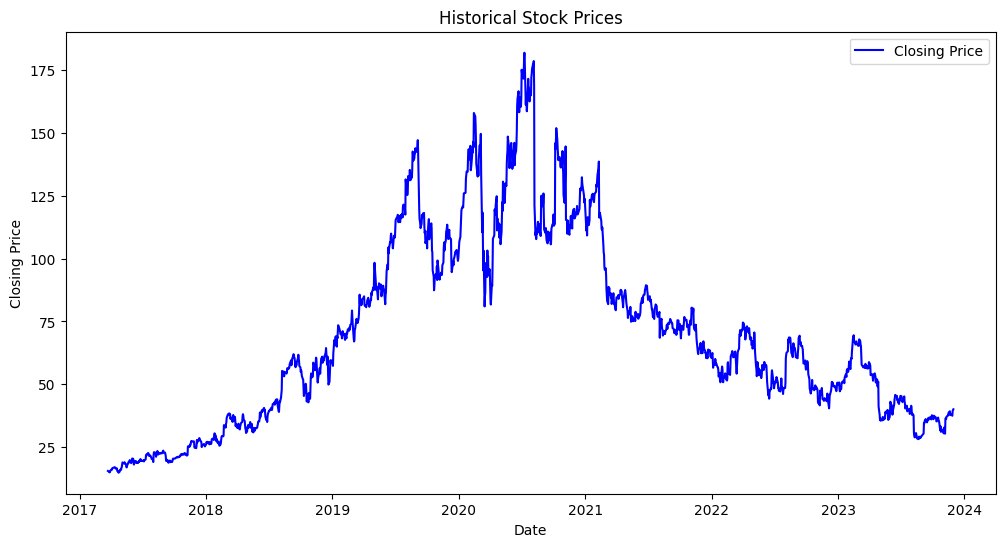

In [14]:
import plotly.graph_objects as go

# Create a DataFrame from the CSV data
df = pd.read_csv('ayx_stock.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

fig.update_layout(title='Candlestick Chart - Historical Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)

fig.show()